![panda](http://res.freestockphotos.biz/thumbs/3/3173-illustration-of-a-giant-panda-eating-bamboo-th.png)

# Pandas Data Cleaning

# Objectives

- Handle missing data, and recognize when different strategies for handling missing data would be appropriate
- Use DataFrame methods (and sometimes lambda functions) to transform data
- Use string methods to transform object-type columns

In [1]:
# Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## To The Center!

That's right - we're still working with Austin Animal Center data! But now, let's check out the Outcomes data, instead of the Intakes data we were working with before.

Data source: https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238

In [3]:
!ls data

Austin_Animal_Center_Intakes-clean-year.csv
Austin_Animal_Center_Outcomes_053122.csv
OpenFoodFacts.csv
heart.csv
new_releases.json
plants.json


In [10]:
# Read in the animal center outcomes data as df
# Can use parse_dates and pass a column name to read it as a datetime
df = pd.read_csv('data/Austin_Animal_Center_Outcomes_053122.csv',
                parse_dates=['DateTime','Date of Birth'])

In [11]:
# Check it out
df

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
...,...,...,...,...,...,...,...,...,...,...,...,...
139952,A800114,*Cascade,2019-08-17 12:21:00,Aug 2019,2019-05-30,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair,Brown Tabby
139953,A858462,NaN,2022-05-30 15:26:00,May 2022,2020-05-30,Euthanasia,Rabies Risk,Other,Unknown,2 years,Bat,Brown
139954,A858365,A858365,2022-05-30 15:08:00,May 2022,2020-05-28,Euthanasia,Rabies Risk,Other,Unknown,2 years,Bat,Brown
139955,A858101,A858101,2022-05-29 12:50:00,May 2022,2021-11-25,Transfer,Partner,Cat,Intact Female,6 months,Domestic Shorthair Mix,Black/White


In [14]:
# Info on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139957 entries, 0 to 139956
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         139957 non-null  object        
 1   Name              98510 non-null   object        
 2   DateTime          139957 non-null  datetime64[ns]
 3   MonthYear         139957 non-null  object        
 4   Date of Birth     139957 non-null  datetime64[ns]
 5   Outcome Type      139934 non-null  object        
 6   Outcome Subtype   64116 non-null   object        
 7   Animal Type       139957 non-null  object        
 8   Sex upon Outcome  139956 non-null  object        
 9   Age upon Outcome  139936 non-null  object        
 10  Breed             139957 non-null  object        
 11  Color             139957 non-null  object        
dtypes: datetime64[ns](2), object(10)
memory usage: 12.8+ MB


## Using Questions to Drive Both Exploration and Cleaning

The best way to think about how to both explore and clean your data set is to think about what is interesting in your data, what questions you have, what you want to know and how to actually get there. We're going to ask a few questions of our dataset, and use that to drive our 'cleaning' process (and talk a little bit about how and when to clean data in the process!)

## Question 1: How old are the animals in our dataset?

Let's try to answer this with the `Age upon Outcome` variable:

In [15]:
df['Age upon Outcome'].value_counts()

1 year       24159
2 years      21943
2 months     17464
3 years       8249
3 months      6761
1 month       6012
4 years       4870
4 months      4597
5 years       4466
5 months      3507
6 months      3408
6 years       2971
8 years       2588
7 years       2573
3 weeks       2375
2 weeks       2338
8 months      2230
10 years      2066
10 months     2019
4 weeks       1992
7 months      1834
9 months      1450
9 years       1425
1 weeks       1041
12 years      1010
11 months      895
11 years       808
1 week         780
13 years       666
14 years       456
3 days         432
2 days         396
15 years       380
1 day          339
6 days         263
4 days         253
0 years        213
5 days         168
16 years       167
5 weeks        152
17 years        93
18 years        57
19 years        28
20 years        22
22 years         6
-1 years         6
24 years         1
23 years         1
-3 years         1
28 years         1
25 years         1
21 years         1
-2 years    

Oh no! These aren't numbers! And the data is pretty dirty! Let's see how we can break this column apart, into the Age Number and the Age Unit.

In [18]:
# Split out the age number and age unit - using string methods!
df['Age upon Outcome'].str.split().str[0]

0         2
1         1
2         1
3         4
4         6
         ..
139952    2
139953    2
139954    2
139955    6
139956    2
Name: Age upon Outcome, Length: 139957, dtype: object

In [19]:
df['Age Number'] = df['Age upon Outcome'].str.split().str[0]
df['Age Unit'] = df['Age upon Outcome'].str.split().str[1]

In [20]:
# Sanity check
df.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age Number,Age Unit
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2,years
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,1,year
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray,1,year
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,4,months
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6,days


In [21]:
# Check the data types really quick...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139957 entries, 0 to 139956
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         139957 non-null  object        
 1   Name              98510 non-null   object        
 2   DateTime          139957 non-null  datetime64[ns]
 3   MonthYear         139957 non-null  object        
 4   Date of Birth     139957 non-null  datetime64[ns]
 5   Outcome Type      139934 non-null  object        
 6   Outcome Subtype   64116 non-null   object        
 7   Animal Type       139957 non-null  object        
 8   Sex upon Outcome  139956 non-null  object        
 9   Age upon Outcome  139936 non-null  object        
 10  Breed             139957 non-null  object        
 11  Color             139957 non-null  object        
 12  Age Number        139936 non-null  object        
 13  Age Unit          139936 non-null  object        
dtypes: d

In [22]:
# Need to make our Age Number actual numbers! 
df['Age Number'].astype(int)
# But this throws an error!

ValueError: cannot convert float NaN to integer

Alas! Nulls! Let's check out these null values:

In [23]:
# Check how many nulls we have in our original Age Upon Outcome column
sum(df['Age upon Outcome'].isna())

21

### Handling Missing Data

A lot of the times we'll have missing information in our data set. This can sometimes be troublesome in what we're trying to do.

There are a few strategies we can choose from and they each have their pros/cons:

- **Fill with a Relevant Value**
    - If we know what the nulls 'should' be, easy to fill them with that value
    - For numbers, perhaps the null indicates a 0
    - Or, for string columns, might be easier to handle if we fill with "Missing" or "Unknown"
- **Fill with a Reasonable Value**
    - For numeric data, it might be acceptable to fill with a measure of central tendency (mean or median)
    - For categorical/string data, might be acceptable to fill with the most common (mode)
    - But beware! Filling in missing values can lead to you drawing incorrect conclusions. If most of the data from a column are missing, it's going to appear that the value you filled it in with is more common that it actually was!
- **Specify Missing Data**
    - If you plan to fill in missing values, it might make sense to specify that the data was originally missing by creating a new indicator column
    - This can be helpful when you suspect that the fact the data was missing could be important for an analysis.
- **Drop Missing Data**
    - While you should try to keep as much relevant data as possible, sometimes the other methods don't make as much sense and it's better to remove or **drop** the missing data
    - We typically drop missing data if very little data would be lost and/or trying to fill in the values wouldn't make sense for our use case



So: what should we do about the missing Age upon Outcome data?

- Drop missing rows (0.015% of data, insignificant amount)



In [24]:
# No matter what - better to make this change on a COPY of the dataframe
df_clean = df.copy()

In [30]:
# Code here to handle nulls
df_clean = df_clean.dropna(subset=['Age upon Outcome'])

In [31]:
# Sanity check
df_clean.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age Number,Age Unit
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2,years
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,1,year
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray,1,year
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,4,months
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6,days


In [33]:
# Cool - now we can make our Age Number column an integer
df_clean['Age Number'] = df_clean["Age Number"].astype(int)

<ipython-input-33-6d5e0f57b0bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Age Number'] = df_clean["Age Number"].astype(int)


In [34]:
# Sanity check
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139936 entries, 0 to 139956
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         139936 non-null  object        
 1   Name              98504 non-null   object        
 2   DateTime          139936 non-null  datetime64[ns]
 3   MonthYear         139936 non-null  object        
 4   Date of Birth     139936 non-null  datetime64[ns]
 5   Outcome Type      139913 non-null  object        
 6   Outcome Subtype   64097 non-null   object        
 7   Animal Type       139936 non-null  object        
 8   Sex upon Outcome  139935 non-null  object        
 9   Age upon Outcome  139936 non-null  object        
 10  Breed             139936 non-null  object        
 11  Color             139936 non-null  object        
 12  Age Number        139936 non-null  int32         
 13  Age Unit          139936 non-null  object        
dtypes: d

Now let's do something about those Age Values...

### Map, Apply and Applymap

Resource: https://www.geeksforgeeks.org/difference-between-map-applymap-and-apply-methods-in-pandas/

The `.map()` method applies a transformation to every entry in the Series. This transformation  "maps" each value from the Series to a new value. A transformation can be defined by a function, Series, or dictionary.

The `.apply()` method is similar to the `.map()` method for Series, but can only take in functions. 

The `.applymap()` method only works on DataFrames, and applies the same transformation to every element (cell) of that DataFrame.

In [35]:
# Providing this dictionary to capture age values in # days (not perfect)
age_vals = {
    'years': 365,
    'year': 365,
    'months': 30,
    'month': 30,
    'weeks': 7,
    'week': 7,
    'days': 1,
    'day': 1
}

In [38]:
# Now, how can we transform the Age Value column to capture these values?
df_clean['Age Unit'] = df_clean['Age Unit'].map(age_vals)

<ipython-input-38-0d772ab34cec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Age Unit'] = df_clean['Age Unit'].map(age_vals)


In [40]:
# Sanity check
df_clean.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age Number,Age Unit
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2,365
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,1,365
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray,1,365
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,4,30
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6,1


In [52]:
# Now, let's make a new Age in Days column!
df_clean['Age in Days'] = df_clean['Age Number'] * df_clean['Age Unit']

<ipython-input-52-c3a541fbc259>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Age in Days'] = df_clean['Age Number'] * df_clean['Age Unit']


In [53]:
# Sanity check
df_clean.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age Number,Age Unit,Age in Days
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2,365,730
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,1,365,365
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray,1,365,365
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,4,30,120
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6,1,6


<AxesSubplot:ylabel='Frequency'>

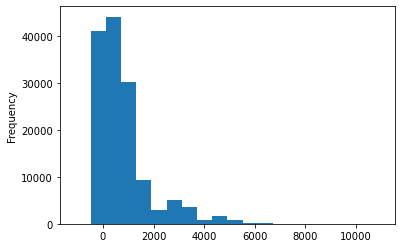

In [47]:
# Now we can visualize!
df_clean['Age in Days'].plot(kind='hist',bins=20)

In [48]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139936 entries, 0 to 139956
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         139936 non-null  object        
 1   Name              98504 non-null   object        
 2   DateTime          139936 non-null  datetime64[ns]
 3   MonthYear         139936 non-null  object        
 4   Date of Birth     139936 non-null  datetime64[ns]
 5   Outcome Type      139913 non-null  object        
 6   Outcome Subtype   64097 non-null   object        
 7   Animal Type       139936 non-null  object        
 8   Sex upon Outcome  139935 non-null  object        
 9   Age upon Outcome  139936 non-null  object        
 10  Breed             139936 non-null  object        
 11  Color             139936 non-null  object        
 12  Age Number        139936 non-null  int32         
 13  Age Unit          139936 non-null  int64         
 14  Age 

In [54]:
# Of course, we could also try...
# Use .dt.normalize on the DateTime column to access the date!
df_clean['Calc Age in Days'] = (df_clean['DateTime'].dt.normalize() - df_clean['Date of Birth']).dt.days

<ipython-input-54-9d3212d6ba6e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Calc Age in Days'] = (df_clean['DateTime'].dt.normalize() - df_clean['Date of Birth']).dt.days


In [55]:
# Check it
df_clean.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age Number,Age Unit,Age in Days,Calc Age in Days
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2,365,730,736
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,1,365,365,371
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray,1,365,365,366
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,4,30,120,128
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6,1,6,6


<AxesSubplot:ylabel='Frequency'>

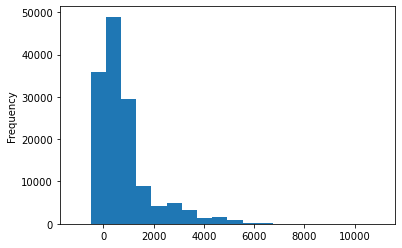

In [59]:
df_clean['Calc Age in Days'].plot(kind='hist',bins=20)

## Question 2: Are Most of The Animals Already Fixed?

Let's use `.map()` to turn the Sex upon Outcome column into a category with three values: Fixed, Intact, or Unknown. 

In [60]:
# Check out what's currently in that column
df_clean['Sex upon Outcome'].unique()

array(['Neutered Male', 'Unknown', 'Intact Male', 'Spayed Female',
       'Intact Female', nan], dtype=object)

In [61]:
# We can write a function for this
def fixed_mapper(status):
    '''
    Takes in the current status of animals and outputs whether they have been fixed
    '''
    if status in ['Neutered Male', 'Spayed Female']:
        return 'Fixed'
    elif status in ['Intact Male', 'Intact Female']:
        return 'Intact'
    else:
        return 'Unknown'

In [67]:
# Now let's use it!
df_clean['Status'] = df_clean['Sex upon Outcome'].map(fixed_mapper)

<ipython-input-67-8407eb531346>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Status'] = df_clean['Sex upon Outcome'].map(fixed_mapper)


In [71]:
# We had a null in that column before, did that change?
df_clean.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age Number,Age Unit,Age in Days,Calc Age in Days,Status
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2,365,730,736,Fixed
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,1,365,365,371,Fixed
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray,1,365,365,366,Unknown
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,4,30,120,128,Fixed
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6,1,6,6,Intact


<AxesSubplot:>

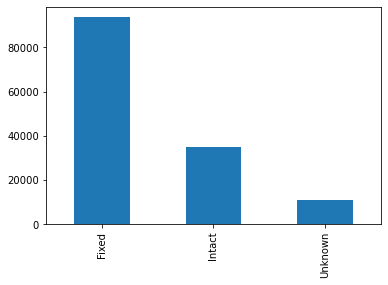

In [73]:
# Visualize it!
df_clean['Status'].value_counts().plot(kind='bar')

## A Quick Aside - for Lambda Functions!

Simple functions can be defined just when you need them, when you would call the function. These are called **lambda functions**. These functions are **anonymous** and disappear immediately after use.

These can often be great as map transformation functions, but they can only do so much.

Let's use them to fill some nulls!

In [74]:
# Check which columns still have null values
df_clean.isna().sum()

Animal ID               0
Name                41432
DateTime                0
MonthYear               0
Date of Birth           0
Outcome Type           23
Outcome Subtype     75839
Animal Type             0
Sex upon Outcome        1
Age upon Outcome        0
Breed                   0
Color                   0
Age Number              0
Age Unit                0
Age in Days             0
Calc Age in Days        0
Status                  0
dtype: int64

Let's look at Outcome Subtype - a lot of nulls, why do we think that is? What would be an appropriate strategy here?

- 


In [80]:
# Let's try it!
# Note: need to use `x is np.nan` as our if condition
df_clean['Outcome Subtype'].apply(lambda x: "N/A" if x is np.nan else x)

0                 N/A
1                 N/A
2                 N/A
3                 N/A
4             Partner
             ...     
139952            N/A
139953    Rabies Risk
139954    Rabies Risk
139955        Partner
139956        Partner
Name: Outcome Subtype, Length: 139936, dtype: object

In [81]:
# BUT! Pandas has a function for this
df_clean['Outcome Subtype'].fillna('N/A')

0                 N/A
1                 N/A
2                 N/A
3                 N/A
4             Partner
             ...     
139952            N/A
139953    Rabies Risk
139954    Rabies Risk
139955        Partner
139956        Partner
Name: Outcome Subtype, Length: 139936, dtype: object

In [ ]:
# We can use one of these methods to fill the nulls for Outcome Type too
# Explore the column here


In [ ]:
# Fill nulls here


In [ ]:
# Sanity Check


### One More Strategy: Build a Missing Indicator

While this doesn't directly answer a question we have, let's go ahead and build a new column to indicate where Name is null (just to demo).

This can be quite useful when modeling, if the data being missing actually means something!

In [83]:
# Quick pandas method for this
df_clean['Outcome Missing'] = df_clean['Outcome Subtype'].isna()

<ipython-input-83-fc323a2e7ab9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Outcome Missing'] = df_clean['Outcome Subtype'].isna()


Might be more interesting to build an indicator of where "Mix" is in the Breed column

In [85]:
# Let's do it
df_clean['Mixed Breed'] = df_clean['Breed'].str.contains("Mix")

<ipython-input-85-c2f89af87600>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Mixed Breed'] = df_clean['Breed'].str.contains("Mix")


In [87]:
# Sanity check
df_clean.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age Number,Age Unit,Age in Days,Calc Age in Days,Status,Outcome Missing,Mixed Breed
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2,365,730,736,Fixed,True,True
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,1,365,365,371,Fixed,True,True
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray,1,365,365,366,Unknown,True,False
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,4,30,120,128,Fixed,True,False
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6,1,6,6,Intact,False,True


## Comparing Before and After

We can now see all the work we did!

In [88]:
# Original data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139957 entries, 0 to 139956
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         139957 non-null  object        
 1   Name              98510 non-null   object        
 2   DateTime          139957 non-null  datetime64[ns]
 3   MonthYear         139957 non-null  object        
 4   Date of Birth     139957 non-null  datetime64[ns]
 5   Outcome Type      139934 non-null  object        
 6   Outcome Subtype   64116 non-null   object        
 7   Animal Type       139957 non-null  object        
 8   Sex upon Outcome  139956 non-null  object        
 9   Age upon Outcome  139936 non-null  object        
 10  Breed             139957 non-null  object        
 11  Color             139957 non-null  object        
 12  Age Number        139936 non-null  object        
 13  Age Unit          139936 non-null  object        
dtypes: d

In [89]:
# Missing data cleaned
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139936 entries, 0 to 139956
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         139936 non-null  object        
 1   Name              98504 non-null   object        
 2   DateTime          139936 non-null  datetime64[ns]
 3   MonthYear         139936 non-null  object        
 4   Date of Birth     139936 non-null  datetime64[ns]
 5   Outcome Type      139913 non-null  object        
 6   Outcome Subtype   64097 non-null   object        
 7   Animal Type       139936 non-null  object        
 8   Sex upon Outcome  139935 non-null  object        
 9   Age upon Outcome  139936 non-null  object        
 10  Breed             139936 non-null  object        
 11  Color             139936 non-null  object        
 12  Age Number        139936 non-null  int32         
 13  Age Unit          139936 non-null  int64         
 14  Age 

# Level Up: `.applymap()`

`.applymap()` is used to apply a transformation to each element of a DataFrame.

In [90]:
# This line will apply the base `type()` function to 
# all entries of the DataFrame.

df.applymap(type).head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age Number,Age Unit
0,<class 'str'>,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
1,<class 'str'>,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
2,<class 'str'>,<class 'float'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
3,<class 'str'>,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
4,<class 'str'>,<class 'float'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>


# Level Up: Faster NumPy Methods

In general, `np.where()` and `np.select()` are faster than `map()`. This won't matter too much with reasonably-sized data but can be a consideration for ***big data***.

In [91]:
# Let's copy the dataframe to play around with
level_up = df_clean.copy()

In [92]:
level_up.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age Number,Age Unit,Age in Days,Calc Age in Days,Status,Outcome Missing,Mixed Breed
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2,365,730,736,Fixed,True,True
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,1,365,365,371,Fixed,True,True
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray,1,365,365,366,Unknown,True,False
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,4,30,120,128,Fixed,True,False
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6,1,6,6,Intact,False,True


## NumPy's `where()` Method

In [93]:
# First pass a condition
level_up['Adopted1'] = np.where(level_up['Outcome Type'] == 'Adoption',
                                True,  # What to fill with if the condition is true
                                False)  # What to fill with if not true
level_up.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age Number,Age Unit,Age in Days,Calc Age in Days,Status,Outcome Missing,Mixed Breed,Adopted1
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2,365,730,736,Fixed,True,True,False
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,1,365,365,371,Fixed,True,True,True
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray,1,365,365,366,Unknown,True,False,False
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,4,30,120,128,Fixed,True,False,True
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6,1,6,6,Intact,False,True,False


In [ ]:
level_up['Adopted2'] = level_up['Outcome Type'].map(lambda x: True if x == 'Adoption' else False)
level_up.head()

In [ ]:
# Let's time how long it takes np.where() to run by running it multiple times
%timeit np.where(level_up['Outcome Type'] == 'Adoption', True, False)

In [ ]:
# Let's time how long it takes .map() to run by running it multiple times
%timeit level_up['Outcome Type'].map(lambda x: True if x == 'Adoption' else False)

## NumPy's `select()` Method

Again, `numpy` will be faster:

In [ ]:
# Define our list of conditions
conditions = [level_up['Sex upon Outcome'] == 'Neutered Male',
              level_up['Sex upon Outcome'] == 'Spayed Female',
              level_up['Sex upon Outcome'] == 'Intact Male',
              level_up['Sex upon Outcome'] == 'Intact Female',
              level_up['Sex upon Outcome'] == 'Unknown',
              level_up['Sex upon Outcome'].isna()]

# Define a matching list of outcomes
choices = ['Fixed', 'Fixed', 'Intact', 'Intact', 'Unknown', 'Unknown']

In [ ]:
# Use np.select
level_up['Grouped Sex upon Outcome1'] = np.select(conditions, choices)
level_up['Grouped Sex upon Outcome1']

In [ ]:
# Check we got the same results with np.where()
(level_up['Grouped Sex upon Outcome1'] != level_up['Grouped Sex upon Outcome']).sum()

In [ ]:
# Let's time how long it takes .map() to run by running it multiple times
%timeit level_up['Sex upon Outcome'].map(fixed_mapper)

In [ ]:
# Let's time how long it takes np.select() to run by running it multiple times
%timeit np.select(conditions, choices)